In [1]:
import pandas as pd
import json
from platform import python_version

In [2]:
print(python_version())
print(pd.__version__)


3.10.10
2.1.1


In [3]:
import os

In [4]:
current_directory = os.getcwd()

In [5]:
files_and_directories = os.listdir('/home/rodrigo/repos/DATAVIZ_project/')

In [6]:
print("Current Directory:", current_directory)
print("files and directories:", files_and_directories)

Current Directory: /home/rodrigo/repos/DATAVIZ_project/dataviz_venv/jupyter_notebooks
files and directories: ['README.md', '.git', 'BIOPRO_G.csv', 'dataviz_venv']


In [7]:
files_and_directories = os.listdir('/home/rodrigo/repos/DATAVIZ_project/dataviz_venv')
print("files and directories:", files_and_directories)

files and directories: ['data', 'include', 'etc', 'python_scripts', 'db', 'lib', 'healthy_levels.py', 'jupyter_notebooks', '.ipynb_checkpoints', 'pyvenv.cfg', 'share', 'lib64', 'bin']


In [8]:
files_and_directories = os.listdir('/home/rodrigo/repos/DATAVIZ_project/dataviz_venv/data')
print("files and directories:", files_and_directories)

files and directories: ['blood_indicators.csv', 'patients.csv']


In [9]:
df = pd.read_csv('/home/rodrigo/repos/DATAVIZ_project/dataviz_venv/data/blood_indicators.csv')
df.head()

,ID,Date,Albumin (g/dL),Albumin (g/L),Alanine aminotransferase ALT (U/L),Aspartate aminotransferase AST (U/L),Alkaline phosphatase (U/L),Blood urea nitrogen (mg/dL),Blood urea nitrogen (mmol/L),Total calcium (mg/dL),...,Uric acid (mg/dL),Uric acid (umol/L),Sodium (mmol/L),lbxsksi,Chloride (mmol/L),Osmolality (mmol/Kg),lbxsgb,Globulin (g/L),Triglycerides (mg/dL),Triglycerides (mmol/L)
0,435,2019-01-01,3.8,38.0,14.0,14.0,78.0,32.0,11.42,9.1,...,7.0,416.4,138.0,4.3,104.0,289.0,3.4,34.0,122.0,1.377
1,918,2019-01-01,4.2,42.0,11.0,18.0,76.0,10.0,3.57,9.7,...,5.2,309.3,141.0,3.6,106.0,280.0,2.8,28.0,96.0,1.084
2,591,2019-01-01,4.7,47.0,27.0,32.0,65.0,14.0,5.00,9.4,...,5.5,327.1,139.0,4.1,105.0,277.0,2.2,22.0,146.0,1.648
3,350,2019-01-01,4.2,42.0,42.0,38.0,94.0,10.0,3.57,9.4,...,5.2,309.3,142.0,4.4,109.0,283.0,2.8,28.0,225.0,2.540
4,663,2019-01-01,4.5,45.0,21.0,26.0,67.0,16.0,5.71,9.9,...,5.1,303.3,143.0,3.3,106.0,286.0,2.9,29.0,151.0,1.705


In [42]:
# Healthy levels for young adults (age 20-39 years) - Reference ranges are approximate and may vary.
healthy_levels_young_adults = {
    "Albumin (g/dL)": {"min": 3.4, "max": 5.4},
    "Albumin (g/L)": {"min": 34, "max": 54},
    "Alanine aminotransferase ALT (U/L)": {"min": 5, "max": 40},
    "Aspartate aminotransferase AST (U/L)": {"min": 8, "max": 48},
    "Alkaline phosphatase (U/L)": {"min": 20, "max": 140},
    "Blood urea nitrogen (mg/dL)": {"min": 8, "max": 25},
    "Blood urea nitrogen (mmol/L)": {"min": 2.9, "max": 8.9},
    "Total calcium (mg/dL)": {"min": 8.6, "max": 10.4},
    "Total calcium (mmol/L)": {"min": 2.1, "max": 2.6},
    "Creatine Phosphokinase (CPK) (IU/L)": {"min": 38, "max": 308},
    "Cholesterol (mg/dL)": {"min": 125, "max": 200},
    "Cholesterol (mmol/L)": {"min": 3.24, "max": 5.18},
    "Bicarbonate (mmol/L)": {"min": 21, "max": 31},
    "Creatinine (mg/dL)": {"min": 0.7, "max": 1.3},
    "Creatinine (umol/L)": {"min": 61.9, "max": 115},
    "Gamma glutamyl transferase (U/L)": {"min": 5, "max": 85},
    "Glucose, serum (mg/dL)": {"min": 70, "max": 100},
    "Glucose, serum (mmol/L)": {"min": 3.9, "max": 5.6},
    "Iron, refrigerated (ug/dL)": {"min": 35, "max": 169},
    "Iron, refrigerated (umol/L)": {"min": 6.26, "max": 30.29},
    "Potassium (mmol/L)": {"min": 3.5, "max": 5.1},  
    "Phosphorus (mg/dL)": {"min": 2.5, "max": 4.9},
    "Phosphorus (mmol/L)": {"min": 0.81, "max": 1.58},  # Calculated from mg/dL
    "Total bilirubin (mg/dL)": {"min": 0.2, "max": 1.2},
    "Total bilirubin (umol/L)": {"min": 3.42, "max": 20.51},
    "Total protein (g/dL)": {"min": 6.6, "max": 8.3},
    "Total protein (g/L)": {"min": 66, "max": 83},
    "Uric acid (mg/dL)": {"min": 2.4, "max": 7.2},
    "Uric acid (umol/L)": {"min": 142, "max": 428},
    "Sodium (mmol/L)": {"min": 135, "max": 146},
    "Lactate dehydrogenase (U/L)": {"min": 140, "max": 280},  
    "Chloride (mmol/L)": {"min": 96, "max": 106},
    "Osmolality (mmol/Kg)": {"min": 275, "max": 295},
    "Globulin (g/dL)": {"min": 2.3, "max": 3.5},  
    "Globulin (g/L)": {"min": 23, "max": 35},  
    "Triglycerides (mg/dL)": {"min": 30, "max": 150},
    "Triglycerides (mmol/L)": {"min": 0.34, "max": 1.69},
}



In [11]:
# Get the first row excluding the first two columns
first_row = df.iloc[0][2:]
first_row

Albumin (g/dL)                             3.8
Albumin (g/L)                             38.0
Alanine aminotransferase ALT (U/L)        14.0
Aspartate aminotransferase AST (U/L)      14.0
Alkaline phosphatase (U/L)                78.0
Blood urea nitrogen (mg/dL)               32.0
Blood urea nitrogen (mmol/L)             11.42
Total calcium (mg/dL)                      9.1
Total calcium (mmol/L)                   2.275
Creatine Phosphokinase (CPK) (IU/L)       47.0
Cholesterol (mg/dL)                       86.0
Cholesterol (mmol/L)                     2.224
Bicarbonate (mmol/L)                      26.0
Creatinine (mg/dL)                        1.46
Creatinine (umol/L)                     129.06
Gamma glutamyl transferase (U/L)           9.0
Glucose, serum (mg/dL)                   210.0
Glucose, serum (mmol/L)                  11.66
Iron, refrigerated (ug/dL)                43.0
Iron, refrigerated (umol/L)                7.7
lbxsldsi                                 135.0
Phosphorus (m

In [12]:
def get_blood_level_color(indicator_name, level, reference_ranges):
    if indicator_name in reference_ranges:
        reference = reference_ranges[indicator_name]
        min_range = reference.get("min")
        max_range = reference.get("max")

        if min_range is not None and max_range is not None:
            if level < min_range or level > max_range:
                return "red"
            elif abs(level - min_range) <= 0.2 * (max_range - min_range) or abs(level - max_range) <= 0.2 * (max_range - min_range):
                return "yellow"
            else:
                return "green"
        else:
            return "Unknown reference range"
    else:
        return "Indicator not found in the reference"

indicator_name = "Cholesterol (mg/dL)"
level = 160
color = get_blood_level_color(indicator_name, level, healthy_levels_young_adults)
print(f"The color for {indicator_name} at level {level} is {color}")


The color for Cholesterol (mg/dL) at level 160 is green


In [13]:
first_row_dict = first_row.to_dict()
first_row_dict

{'Albumin (g/dL)': 3.8,
 'Albumin (g/L)': 38.0,
 'Alanine aminotransferase ALT (U/L)': 14.0,
 'Aspartate aminotransferase AST (U/L)': 14.0,
 'Alkaline phosphatase (U/L)': 78.0,
 'Blood urea nitrogen (mg/dL)': 32.0,
 'Blood urea nitrogen (mmol/L)': 11.42,
 'Total calcium (mg/dL)': 9.1,
 'Total calcium (mmol/L)': 2.275,
 'Creatine Phosphokinase (CPK) (IU/L)': 47.0,
 'Cholesterol (mg/dL)': 86.0,
 'Cholesterol (mmol/L)': 2.224,
 'Bicarbonate (mmol/L)': 26.0,
 'Creatinine (mg/dL)': 1.46,
 'Creatinine (umol/L)': 129.06,
 'Gamma glutamyl transferase (U/L)': 9.0,
 'Glucose, serum (mg/dL)': 210.0,
 'Glucose, serum (mmol/L)': 11.66,
 'Iron, refrigerated (ug/dL)': 43.0,
 'Iron, refrigerated (umol/L)': 7.7,
 'lbxsldsi': 135.0,
 'Phosphorus (mg/dL)': 4.9,
 'lbdsphsi': 1.582,
 'Total bilirubin (mg/dL)': 0.7,
 'Total bilirubin (umol/L)': 11.97,
 'Total protein (g/dL)': 7.2,
 'Total protein (g/L)': 72.0,
 'Uric acid (mg/dL)': 7.0,
 'Uric acid (umol/L)': 416.4,
 'Sodium (mmol/L)': 138.0,
 'lbxsksi': 4.

In [43]:
def color_mapping(indicators_data, reference_ranges):
    colored_indicators = {}

    for indicator_name, level in indicators_data.items():
        colored_indicators[indicator_name] = [level, get_blood_level_color(indicator_name, level, reference_ranges)]
    return colored_indicators


def get_blood_level_color(indicator_name, level, reference_ranges):
    if indicator_name in reference_ranges:
        reference = reference_ranges[indicator_name]
        min_range = reference.get("min")
        max_range = reference.get("max")

        if min_range is not None and max_range is not None:
            if level < min_range or level > max_range:
                return "red"
            elif abs(level - min_range) <= 0.2 * (max_range - min_range) or abs(level - max_range) <= 0.2 * (
                    max_range - min_range):
                return "yellow"
            else:
                return "green"
        else:
            return "Unknown reference range"
    else:
        return "Indicator not found in the reference"


# Example usage
indicators_data = first_row_dict

colored_indicators = color_mapping(indicators_data, healthy_levels_young_adults)

# Print the result
for indicator_name, data in colored_indicators.items():
    print(f"{indicator_name}: {data[0]} {data[1]}")

          
        

Albumin (g/dL): 3.8 yellow
Albumin (g/L): 38.0 yellow
Alanine aminotransferase ALT (U/L): 14.0 green
Aspartate aminotransferase AST (U/L): 14.0 yellow
Alkaline phosphatase (U/L): 78.0 green
Blood urea nitrogen (mg/dL): 32.0 red
Blood urea nitrogen (mmol/L): 11.42 red
Total calcium (mg/dL): 9.1 green
Total calcium (mmol/L): 2.275 green
Creatine Phosphokinase (CPK) (IU/L): 47.0 yellow
Cholesterol (mg/dL): 86.0 red
Cholesterol (mmol/L): 2.224 red
Bicarbonate (mmol/L): 26.0 green
Creatinine (mg/dL): 1.46 red
Creatinine (umol/L): 129.06 red
Gamma glutamyl transferase (U/L): 9.0 yellow
Glucose, serum (mg/dL): 210.0 red
Glucose, serum (mmol/L): 11.66 red
Iron, refrigerated (ug/dL): 43.0 yellow
Iron, refrigerated (umol/L): 7.7 yellow
lbxsldsi: 135.0 Indicator not found in the reference
Phosphorus (mg/dL): 4.9 yellow
lbdsphsi: 1.582 Indicator not found in the reference
Total bilirubin (mg/dL): 0.7 green
Total bilirubin (umol/L): 11.97 green
Total protein (g/dL): 7.2 green
Total protein (g/L): 7

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = {
    "Albumin (g/dL)": [3.8, "yellow"],
    "Albumin (g/L)": [38.0, "yellow"],
    "Alanine aminotransferase ALT (U/L)": [14.0, "green"],
    "Aspartate aminotransferase AST (U/L)": [14.0, "yellow"],
    "Alkaline phosphatase (U/L)": [78.0, "green"],
    "Blood urea nitrogen (mg/dL)": [32.0, "red"],
    "Blood urea nitrogen (mmol/L)": [11.42, "red"],
    "Total calcium (mg/dL)": [9.1, "green"],
    "Total calcium (mmol/L)": [2.275, "green"],
    "Creatine Phosphokinase (CPK) (IU/L)": [47.0, "Unknown reference range"],
    "Cholesterol (mg/dL)": [86.0, "red"],
    "Cholesterol (mmol/L)": [2.224, "red"],
    "Bicarbonate (mmol/L)": [26.0, "green"],
    "Creatinine (mg/dL)": [1.46, "red"],
    "Creatinine (umol/L)": [129.06, "red"],
    "Gamma glutamyl transferase (U/L)": [9.0, "yellow"],
    "Glucose, serum (mg/dL)": [210.0, "red"],
    "Glucose, serum (mmol/L)": [11.66, "red"],
    "Iron, refrigerated (ug/dL)": [43.0, "yellow"],
    "Iron, refrigerated (umol/L)": [7.7, "yellow"],
    "lbxsldsi": [135.0, "Unknown reference range"],
    "Phosphorus (mg/dL)": [4.9, "yellow"],
    "lbdsphsi": [1.582, "Unknown reference range"],
    "Total bilirubin (mg/dL)": [0.7, "green"],
    "Total bilirubin (umol/L)": [11.97, "green"],
    "Total protein (g/dL)": [7.2, "green"],
    "Total protein (g/L)": [72.0, "green"],
    "Uric acid (mg/dL)": [7.0, "yellow"],
    "Uric acid (umol/L)": [416.4, "yellow"],
    "Sodium (mmol/L)": [138.0, "green"],
    "lbxsksi": [4.3, "Unknown reference range"],
    "Chloride (mmol/L)": [104.0, "yellow"],
    "Osmolality (mmol/Kg)": [289.0, "green"],
    "lbxsgb": [3.4, "Unknown reference range"],
    "Globulin (g/L)": [34.0, "yellow"],
    "Triglycerides (mg/dL)": [122.0, "green"],
    "Triglycerides (mmol/L)": [1.377, "green"],
}

# Extract values and colors
values = [item[0] if isinstance(item[0], (int, float)) else np.nan for item in data.values()]
colors = ['white' if np.isnan(value) else 'red' if color == 'red' else 'green' if color == 'green' else 'yellow' for _, color in data.values()]

# Reshape the values for imshow
values = np.array(values).reshape(1, -1)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(values, cmap='coolwarm', aspect='auto')

# Add text annotations
for i, txt in enumerate(data.keys()):
    ax.text(0, i, txt, ha='right', va='center')

# Display the actual level values
for i, val in enumerate(values[0]):
    ax.text(i, 0, f"{val}", ha='center', va='center', color=colors[i])

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Add colorbar
cbar = fig.colorbar(cax, orientation='horizontal', pad=0.02)
cbar.set_label("Level")

plt.show()


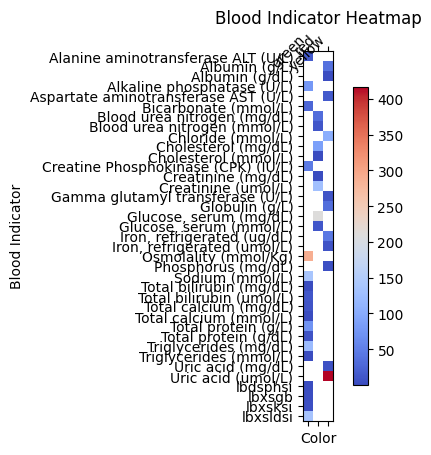

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your provided data
data = first_row_dict

# Create a DataFrame
df = pd.DataFrame(data.items(), columns=['Indicator', 'Level'])

# Define your function with modified logic to return color codes
def get_blood_level_color(level, reference):
    if 'min' in reference and 'max' in reference:
        if level < reference['min']:
            return "red"
        elif level > reference['max']:
            return "red"
        elif abs(level - reference['min']) <= 0.2 * (reference['max'] - reference['min']):
            return "yellow"
        elif abs(level - reference['max']) <= 0.2 * (reference['max'] - reference['min']):
            return "yellow"
    return "green"

# Apply the function to get colors for each data point
df['Color'] = df.apply(lambda row: get_blood_level_color(row['Level'], healthy_levels_young_adults.get(row['Indicator'], {})), axis=1)


# Reshape the data for the heatmap using pivot_table
heatmap_data = df.pivot_table(index="Indicator", columns="Color", values="Level", aggfunc='first')


# Create the heatmap using Matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(heatmap_data, cmap='coolwarm')
plt.colorbar(cax, fraction=0.03, pad=0.04)
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns)
ax.set_yticklabels(heatmap_data.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Color")
plt.ylabel("Blood Indicator")
plt.title("Blood Indicator Heatmap")
plt.show()


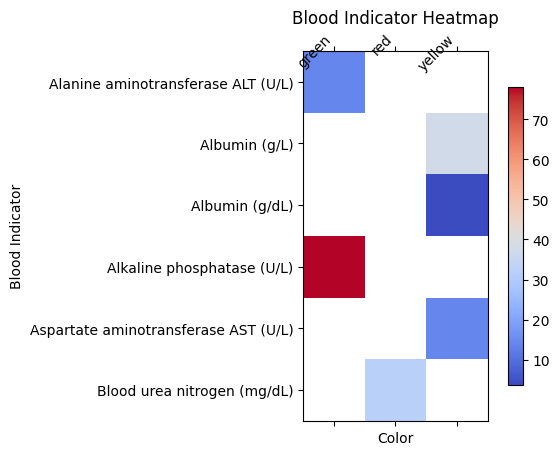

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your provided data
data = {
    'Albumin (g/dL)': 3.8,
    'Albumin (g/L)': 38.0,
    'Alanine aminotransferase ALT (U/L)': 14.0,
    'Aspartate aminotransferase AST (U/L)': 14.0,
    'Alkaline phosphatase (U/L)': 78.0,
    'Blood urea nitrogen (mg/dL)': 32.0,
}

# Create a DataFrame
df = pd.DataFrame(data.items(), columns=['Indicator', 'Level'])

# Define your function with modified logic to return color codes
def get_blood_level_color(level, reference):
    if 'min' in reference and 'max' in reference:
        if level < reference['min']:
            return "red"
        elif level > reference['max']:
            return "red"
        elif abs(level - reference['min']) <= 0.2 * (reference['max'] - reference['min']):
            return "yellow"
        elif abs(level - reference['max']) <= 0.2 * (reference['max'] - reference['min']):
            return "yellow"
    return "green"

# Apply the function to get colors for each data point
df['Color'] = df.apply(lambda row: get_blood_level_color(row['Level'], healthy_levels_young_adults.get(row['Indicator'], {})), axis=1)


# Reshape the data for the heatmap using pivot_table
heatmap_data = df.pivot_table(index="Indicator", columns="Color", values="Level", aggfunc='first')


# Create the heatmap using Matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(heatmap_data, cmap='coolwarm')
plt.colorbar(cax, fraction=0.03, pad=0.04)
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns)
ax.set_yticklabels(heatmap_data.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Color")
plt.ylabel("Blood Indicator")
plt.title("Blood Indicator Heatmap")
plt.show()



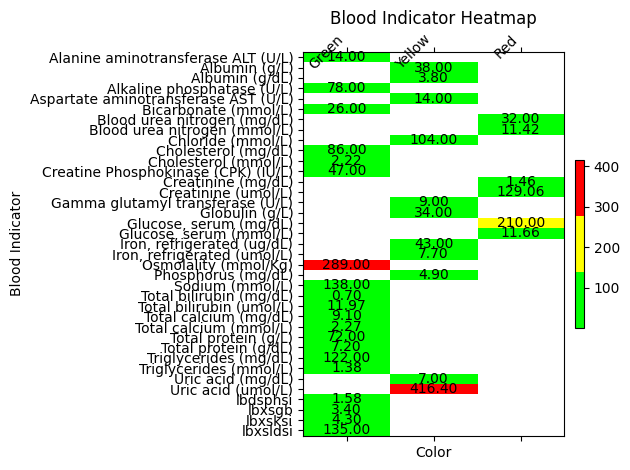

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Your provided data
data = {
    "Albumin (g/dL)": [3.8, "yellow"],
    "Albumin (g/L)": [38.0, "yellow"],
    "Alanine aminotransferase ALT (U/L)": [14.0, "green"],
    "Aspartate aminotransferase AST (U/L)": [14.0, "yellow"],
    "Alkaline phosphatase (U/L)": [78.0, "green"],
    "Blood urea nitrogen (mg/dL)": [32.0, "red"],
    "Blood urea nitrogen (mmol/L)": [11.42, "red"],
    "Total calcium (mg/dL)": [9.1, "green"],
    "Total calcium (mmol/L)": [2.275, "green"],
    "Creatine Phosphokinase (CPK) (IU/L)": [47.0, "Unknown reference range"],
    "Cholesterol (mg/dL)": [86.0, "red"],
    "Cholesterol (mmol/L)": [2.224, "red"],
    "Bicarbonate (mmol/L)": [26.0, "green"],
    "Creatinine (mg/dL)": [1.46, "red"],
    "Creatinine (umol/L)": [129.06, "red"],
    "Gamma glutamyl transferase (U/L)": [9.0, "yellow"],
    "Glucose, serum (mg/dL)": [210.0, "red"],
    "Glucose, serum (mmol/L)": [11.66, "red"],
    "Iron, refrigerated (ug/dL)": [43.0, "yellow"],
    "Iron, refrigerated (umol/L)": [7.7, "yellow"],
    "lbxsldsi": [135.0, "Unknown reference range"],
    "Phosphorus (mg/dL)": [4.9, "yellow"],
    "lbdsphsi": [1.582, "Unknown reference range"],
    "Total bilirubin (mg/dL)": [0.7, "green"],
    "Total bilirubin (umol/L)": [11.97, "green"],
    "Total protein (g/dL)": [7.2, "green"],
    "Total protein (g/L)": [72.0, "green"],
    "Uric acid (mg/dL)": [7.0, "yellow"],
    "Uric acid (umol/L)": [416.4, "yellow"],
    "Sodium (mmol/L)": [138.0, "green"],
    "lbxsksi": [4.3, "Unknown reference range"],
    "Chloride (mmol/L)": [104.0, "yellow"],
    "Osmolality (mmol/Kg)": [289.0, "green"],
    "lbxsgb": [3.4, "Unknown reference range"],
    "Globulin (g/L)": [34.0, "yellow"],
    "Triglycerides (mg/dL)": [122.0, "green"],
    "Triglycerides (mmol/L)": [1.377, "green"],
}


# Create a DataFrame
df = pd.DataFrame(data.items(), columns=['Indicator', 'Level'])

# Define a custom colormap with three colors: green, yellow, and red
colors = ['#00FF00', '#FFFF00', '#FF0000']
cmap = ListedColormap(colors)

# Define your function with modified logic to return color codes
def get_blood_level_color(level, reference):
    if 'min' in reference and 'max' in reference:
        if level < reference['min']:
            return 0  # Green
        elif level > reference['max']:
            return 2  # Red
        elif abs(level - reference['min']) <= 0.2 * (reference['max'] - reference['min']):
            return 1  # Yellow
        elif abs(level - reference['max']) <= 0.2 * (reference['max'] - reference['min']):
            return 1  # Yellow
    return 0  # Default to green

# Apply the function to get color codes for each data point
df['Color'] = df.apply(lambda row: get_blood_level_color(row['Level'], healthy_levels_young_adults.get(row['Indicator'], {})), axis=1)

# Reshape the data for the heatmap using pivot_table
heatmap_data = df.pivot_table(index="Indicator", columns="Color", values="Level", aggfunc='first', fill_value=np.nan)

# Create the heatmap using Matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(heatmap_data, cmap=cmap, aspect='auto')
plt.colorbar(cax, fraction=0.03, pad=0.04)
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(['Green', 'Yellow', 'Red'])
ax.set_yticklabels(heatmap_data.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Color")
plt.ylabel("Blood Indicator")
plt.title("Blood Indicator Heatmap")

# Show values in the heatmap
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        if not np.isnan(value):
            ax.text(j, i, f'{value:.2f}', ha="center", va="center", color='black')

plt.tight_layout()
plt.show()


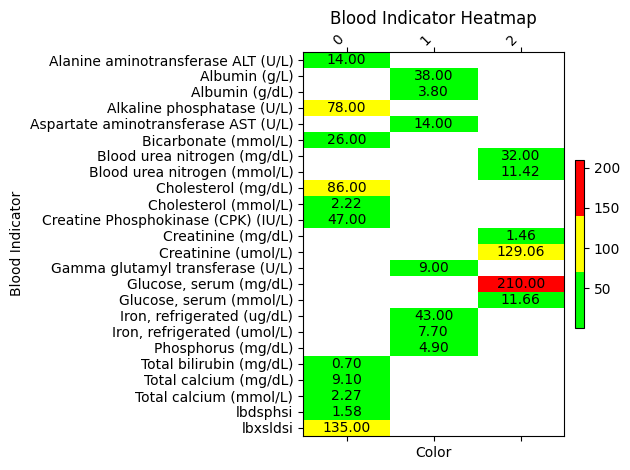

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Your provided data
data = {
     'Albumin (g/dL)': 3.8,
     'Albumin (g/L)': 38.0,
     'Alanine aminotransferase ALT (U/L)': 14.0,
     'Aspartate aminotransferase AST (U/L)': 14.0,
     'Alkaline phosphatase (U/L)': 78.0,
     'Blood urea nitrogen (mg/dL)': 32.0,
     'Blood urea nitrogen (mmol/L)': 11.42,
     'Total calcium (mg/dL)': 9.1,
     'Total calcium (mmol/L)': 2.275,
     'Creatine Phosphokinase (CPK) (IU/L)': 47.0,
     'Cholesterol (mg/dL)': 86.0,
     'Cholesterol (mmol/L)': 2.224,
     'Bicarbonate (mmol/L)': 26.0,
     'Creatinine (mg/dL)': 1.46,
     'Creatinine (umol/L)': 129.06,
     'Gamma glutamyl transferase (U/L)': 9.0,
     'Glucose, serum (mg/dL)': 210.0,
     'Glucose, serum (mmol/L)': 11.66,
     'Iron, refrigerated (ug/dL)': 43.0,
     'Iron, refrigerated (umol/L)': 7.7,
     'lbxsldsi': 135.0,
     'Phosphorus (mg/dL)': 4.9,
     'lbdsphsi': 1.582,
     'Total bilirubin (mg/dL)': 0.7,
}


# Create a DataFrame
df = pd.DataFrame(data.items(), columns=['Indicator', 'Level'])

# Define a custom colormap with three colors: green, yellow, and red
colors = ['#00FF00', '#FFFF00', '#FF0000']
cmap = ListedColormap(colors)

# Define your function with modified logic to return color codes
def get_blood_level_color(level, reference):
    if 'min' in reference and 'max' in reference:
        if level < reference['min']:
            return 0  # Green
        elif level > reference['max']:
            return 2  # Red
        elif abs(level - reference['min']) <= 0.2 * (reference['max'] - reference['min']):
            return 1  # Yellow
        elif abs(level - reference['max']) <= 0.2 * (reference['max'] - reference['min']):
            return 1  # Yellow
    return 0  # Default to green

# Apply the function to get color codes for each data point
df['Color'] = df.apply(lambda row: get_blood_level_color(row['Level'], healthy_levels_young_adults.get(row['Indicator'], {})), axis=1)

# Reshape the data for the heatmap using pivot_table
heatmap_data = df.pivot_table(index="Indicator", columns="Color", values="Level", aggfunc='first', fill_value=np.nan)

# Create the heatmap using Matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(heatmap_data, cmap=cmap, aspect='auto')
plt.colorbar(cax, fraction=0.03, pad=0.04)
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Color")
plt.ylabel("Blood Indicator")
plt.title("Blood Indicator Heatmap")

# Show values in the heatmap
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        if not np.isnan(value):
            ax.text(j, i, f'{value:.2f}', ha="center", va="center", color='black')

plt.tight_layout()
plt.show()


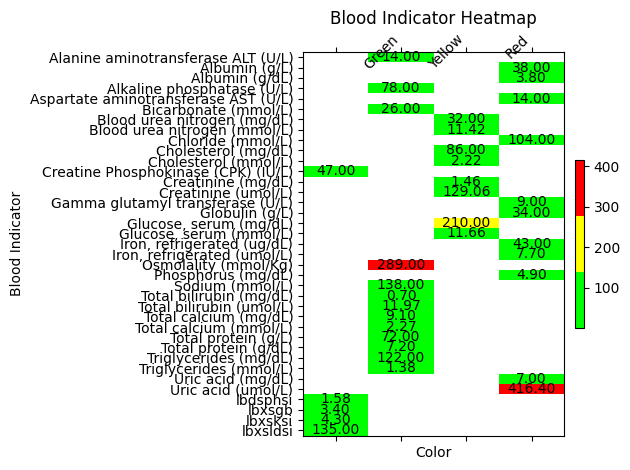

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Your provided data
data = {
    "Albumin (g/dL)": [3.8, "yellow"],
    "Albumin (g/L)": [38.0, "yellow"],
    "Alanine aminotransferase ALT (U/L)": [14.0, "green"],
    "Aspartate aminotransferase AST (U/L)": [14.0, "yellow"],
    "Alkaline phosphatase (U/L)": [78.0, "green"],
    "Blood urea nitrogen (mg/dL)": [32.0, "red"],
    "Blood urea nitrogen (mmol/L)": [11.42, "red"],
    "Total calcium (mg/dL)": [9.1, "green"],
    "Total calcium (mmol/L)": [2.275, "green"],
    "Creatine Phosphokinase (CPK) (IU/L)": [47.0, "Unknown reference range"],
    "Cholesterol (mg/dL)": [86.0, "red"],
    "Cholesterol (mmol/L)": [2.224, "red"],
    "Bicarbonate (mmol/L)": [26.0, "green"],
    "Creatinine (mg/dL)": [1.46, "red"],
    "Creatinine (umol/L)": [129.06, "red"],
    "Gamma glutamyl transferase (U/L)": [9.0, "yellow"],
    "Glucose, serum (mg/dL)": [210.0, "red"],
    "Glucose, serum (mmol/L)": [11.66, "red"],
    "Iron, refrigerated (ug/dL)": [43.0, "yellow"],
    "Iron, refrigerated (umol/L)": [7.7, "yellow"],
    "lbxsldsi": [135.0, "Unknown reference range"],
    "Phosphorus (mg/dL)": [4.9, "yellow"],
    "lbdsphsi": [1.582, "Unknown reference range"],
    "Total bilirubin (mg/dL)": [0.7, "green"],
    "Total bilirubin (umol/L)": [11.97, "green"],
    "Total protein (g/dL)": [7.2, "green"],
    "Total protein (g/L)": [72.0, "green"],
    "Uric acid (mg/dL)": [7.0, "yellow"],
    "Uric acid (umol/L)": [416.4, "yellow"],
    "Sodium (mmol/L)": [138.0, "green"],
    "lbxsksi": [4.3, "Unknown reference range"],
    "Chloride (mmol/L)": [104.0, "yellow"],
    "Osmolality (mmol/Kg)": [289.0, "green"],
    "lbxsgb": [3.4, "Unknown reference range"],
    "Globulin (g/L)": [34.0, "yellow"],
    "Triglycerides (mg/dL)": [122.0, "green"],
    "Triglycerides (mmol/L)": [1.377, "green"],
}

# Create a DataFrame
df = pd.DataFrame(data.values(), index=data.keys(), columns=['Level', 'Color'])

# Define a custom colormap with three colors: green, yellow, and red
colors = ['#00FF00', '#FFFF00', '#FF0000']
cmap = ListedColormap(colors)

# Reshape the data for the heatmap using pivot_table
heatmap_data = df.pivot_table(index=df.index, columns="Color", values="Level", aggfunc='first', fill_value=np.nan)

# Create the heatmap using Matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(heatmap_data, cmap=cmap, aspect='auto')
plt.colorbar(cax, fraction=0.03, pad=0.04)

# Set x-axis ticks and labels
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_xticklabels(['', 'Green', 'Yellow', 'Red'])  # Add an empty label as the first one

# Set y-axis ticks and labels
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Color")
plt.ylabel("Blood Indicator")
plt.title("Blood Indicator Heatmap")

# Show values in the heatmap
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        if not np.isnan(value):
            ax.text(j, i, f'{value:.2f}', ha="center", va="center", color='black')

plt.tight_layout()
plt.show()


